# Activity Analysis

> Author: [Yalim Demirkesen](https://github.com/demirkeseny)

In this notebook, there are the analysis about 8 fitbit users. First preprocessing was done to get the columns in the desired format and filter the specific users, then we are left with data we analyzed to get an overall understanding and interpret the trends.

In [96]:
# libraries necessary
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

## Preprocessing

In [2]:
# CSV location in the working directory for the dailyActivity_merged.csv
csv_loc = './mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'

In [3]:
activities = pd.read_csv(csv_loc)

In [4]:
activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
activities.shape

(940, 15)

In [6]:
# including only the columns that we will use in our analysis:
activities = activities[['Id','ActivityDate','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']]

In [7]:
activities.head()

,Id,ActivityDate,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,25,13,328,728,1985
1,1503960366,4/13/2016,21,19,217,776,1797
2,1503960366,4/14/2016,30,11,181,1218,1776
3,1503960366,4/15/2016,29,34,209,726,1745
4,1503960366,4/16/2016,36,10,221,773,1863


In [8]:
# checking the number of nulls:
activities.isnull().sum()

Id                      0
ActivityDate            0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
dtype: int64

In [9]:
# checking the type of columns:
activities.dtypes

Id                       int64
ActivityDate            object
VeryActiveMinutes        int64
FairlyActiveMinutes      int64
LightlyActiveMinutes     int64
SedentaryMinutes         int64
Calories                 int64
dtype: object

In [10]:
activities['ActivityDate'] = pd.to_datetime(activities['ActivityDate'])

In [11]:
# checking if we were able to change the format of the ActivityDate columns:
activities.dtypes

Id                               int64
ActivityDate            datetime64[ns]
VeryActiveMinutes                int64
FairlyActiveMinutes              int64
LightlyActiveMinutes             int64
SedentaryMinutes                 int64
Calories                         int64
dtype: object

In [12]:
activities.head()

,Id,ActivityDate,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,25,13,328,728,1985
1,1503960366,2016-04-13,21,19,217,776,1797
2,1503960366,2016-04-14,30,11,181,1218,1776
3,1503960366,2016-04-15,29,34,209,726,1745
4,1503960366,2016-04-16,36,10,221,773,1863


In the other CSV files, we have only good amount of information about 12 participants. They are listed below with their IDs:

In [119]:
mask = [8792009665,
 5553957443,
 5577150313,
 4020332650,
 6962181067,
 6117666160,
 2347167796,
 4388161847]

In [120]:
# Let's filter the data so that we only have the users we need:
activities = activities.loc[activities['Id'].isin(mask)]

In [121]:
activities.shape

(229, 7)

In the initial stage we had 940 activity dates now we are left with 348 after excluding certain users.

In [122]:
activities.reset_index(drop=True, inplace=True)

In [123]:
activities.head()

,Id,ActivityDate,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,2347167796,2016-04-12,28,13,320,964,2344
1,2347167796,2016-04-13,19,32,195,676,2038
2,2347167796,2016-04-14,1,48,206,705,2010
3,2347167796,2016-04-15,1,24,284,720,2133
4,2347167796,2016-04-16,66,72,268,968,2670


## Exploratory Data Analysis

In [124]:
participants_avg = pd.DataFrame(None, 
            columns=['Id','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories'])

In [125]:
participants_avg['Id'] = pd.Series(mask)

In [127]:
for col in participants_avg.columns.tolist()[1:]:
    for i in range(len(participants_avg)):
        participants_avg[col][i] = round(activities[activities['Id'] == participants_avg['Id'][i]][col].mean(),4)

C:\Users\demir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [128]:
participants_avg.columns = ['Id','VeryAvg','FairAvg','LightAvg','SedentaryAvg','CaloriesAvg']

In [129]:
participants_avg['Id'] = participants_avg['Id'].astype(str)

In [130]:
participants_avg

,Id,VeryAvg,FairAvg,LightAvg,SedentaryAvg,CaloriesAvg
0,8792009665,0.9655,4.0345,91.7931,1060.48,1962.31
1,5553957443,23.4194,13,206.194,668.355,1875.68
2,5577150313,87.3333,29.8333,147.933,754.433,3359.63
3,4020332650,5.1935,5.3548,76.9355,1237.26,2385.81
4,6962181067,22.8065,18.5161,245.806,662.323,1982.03
5,6117666160,1.5714,2.0357,288.357,796.286,2261.14
6,2347167796,13.5,20.5556,252.5,687.167,2043.44
7,4388161847,23.1613,20.3548,229.355,836.677,3093.87


In [131]:
trace1 = go.Bar(
    x=["Id:" + identity for identity in participants_avg['Id'].tolist()],
    y=participants_avg['VeryAvg'].tolist(),
    name='Average Very Active Minute (min)'
)
trace2 = go.Bar(
    x=["Id:" + identity for identity in participants_avg['Id'].tolist()],
    y=participants_avg['FairAvg'].tolist(),
    name='Average Fairly Active Minute (min)'
)

trace3 = go.Bar(
    x=["Id:" + identity for identity in participants_avg['Id'].tolist()],
    y=participants_avg['LightAvg'].tolist(),
    name='Average Lightly Active Minute (min)'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

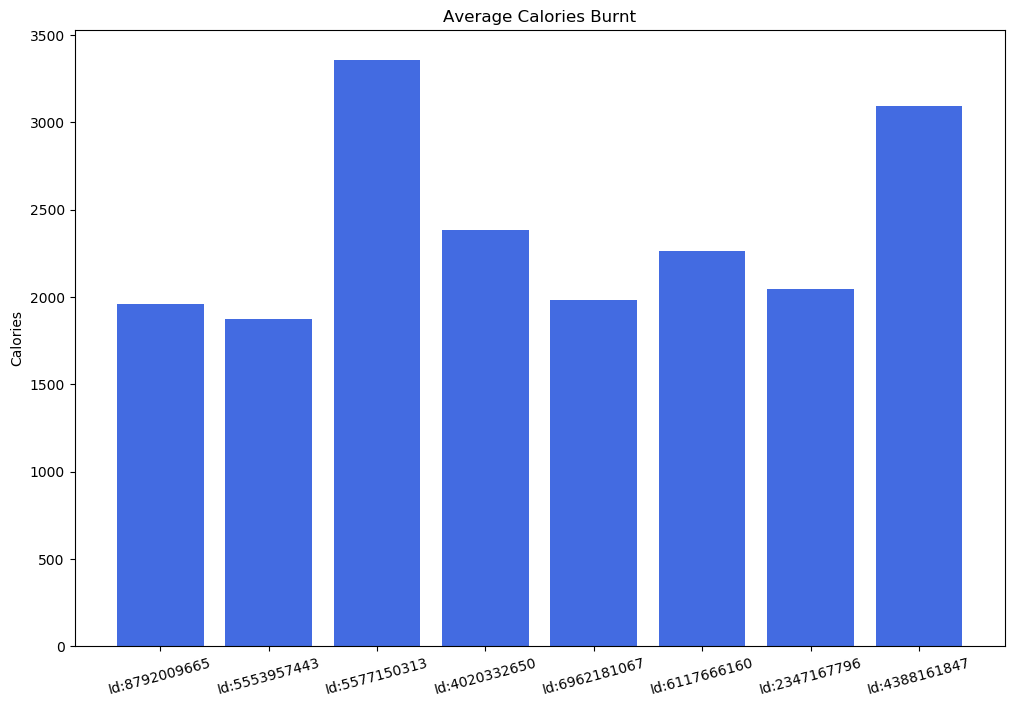

In [136]:
objects = ["Id:" + identity for identity in participants_avg['Id'].tolist()]
y_pos = np.arange(len(objects))
performance = participants_avg.CaloriesAvg.tolist()

plt.figure(figsize=(12,8))
plt.bar(y_pos, performance, align='center',alpha = 0.99, color = 'royalblue')
plt.xticks(y_pos, objects)
plt.xticks(rotation=15)

plt.ylabel('Calories')
plt.title('Average Calories Burnt')
 
plt.show()